In [2]:
import pandas as pd
import json
from generate_graph import get_propositions, generateEdges, createGraph, get_propositions_nosplit
from refine_graph import refine
from query_graph import QueryGraph
from tqdm import tqdm
from datasets import load_dataset
tqdm.pandas()

ds = load_dataset("google-research-datasets/natural_questions", "dev")

/Users/user/miniconda3/envs/graphmaker/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Datasets

{'id': '-5501481664893105662',
 'document': {'title': 'Wave–particle duality',
  'url': 'https://en.wikipedia.org//w/index.php?title=Wave%E2%80%93particle_duality&amp;oldid=837021290',
  'html': '<!DOCTYPE html>\n<HTML class="client-js ve-not-available" lang="en" dir="ltr"><HEAD>\n\n<TITLE>Wave–particle duality - Wikipedia</TITLE>\n\n\n<LINK rel="stylesheet" href="/w/load.php?debug=false&amp;lang=en&amp;modules=ext.cite.styles%7Cext.math.styles%7Cext.tmh.thumbnail.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cmediawiki.legacy.commonPrint%2Cshared%7Cmediawiki.sectionAnchor%7Cmediawiki.skinning.interface%7Cskins.vector.styles%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" />\n\n<STYLE>\n.referencetooltip{position:absolute;list-style:none;list-style-image:none;opacity:0;font-size:12px;margin:0;z-index:5;padding:0}.referencetooltip > li{background:#fff;border:1px solid #bbb;-webkit-box-shadow:0 0 10px rgba(0,0,0,0.2);-moz-b
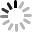
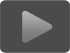
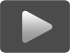

In [5]:
# ds = load_dataset("google-research-datasets/natural_questions", "dev")
ds['validation'][0]

## Experiments

To run the evaluation script

```
python evaluate-v2.0.py <path_to_dev-v2.0> <path_to_predictions>
```

Example:

```
python evaluate-v2.0.py <dev-v2.0.json> <predictions.json>

python evalscripts/SQuADv2/evaluate-v2.0.py evalscripts/SQuADv2/dev-v2.0.json evalscripts/SQuADv2/predictions.json

```

### Initial Experiment

In [ ]:
df_squadv2.info()

In [5]:
context_list = df_squadv2['context'].unique()

In [ ]:
len(context_list)

In [ ]:
context_list[0:2]

In [ ]:
propositions = []

for context in context_list:
    get_propositions(context, propositions)

In [ ]:
# Open the file in read mode
with open('propositions.txt', 'r') as file:
    # Read all lines and store them in a list
    propositions_from_file = [line.strip() for line in file]

print(propositions_from_file)

In [ ]:
len(propositions_from_file)

2500 props takes 97 mins

In [ ]:
# 0-2500
# Done
list_of_edges = generateEdges(propositions_from_file[0:2500])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 2500-5000
# Done
list_of_edges = generateEdges(propositions_from_file[2500:5000])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 5000-7500
# Done
list_of_edges = generateEdges(propositions_from_file[5000:7500])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 7500-10000
# done
list_of_edges = generateEdges(propositions_from_file[7500:10000])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 10000-12500
# TO FOLLOW
list_of_edges = generateEdges(propositions_from_file[10000:12500])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 12500-15000
# TO FOLLOW
list_of_edges = generateEdges(propositions_from_file[12500:15000])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 15000-17500
# TO FOLLOW
list_of_edges = generateEdges(propositions_from_file[15000:17500])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 17500-20000
# TO FOLLOW
list_of_edges = generateEdges(propositions_from_file[17500:20000])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
# 20000-22420
# TO FOLLOW
list_of_edges = generateEdges(propositions_from_file[20000:22420])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [15]:
qg = QueryGraph()
my_dict = {}

# Define a function to apply to each row
def print_qa(row):
    
    question = row['question']
    questionid = row['id']
    req = qg.get_requirements(question)
    result = qg.answer_question(question, req.content)
    
    
    if result is not None:
    
        model_answer = result['result']

        if "don't know the answer" in model_answer:
            model_answer = ""
    
        if len(row['answers']['text']) > 0:
            real_answer = row['answers']['text'][0]
        else:
            real_answer = "\"\""

        if len(result['intermediate_steps']) > 0:
            cypher_query = result['intermediate_steps'][0]['query']
            context = result['intermediate_steps'][1]['context']
       
            if(len(context) < 1):
            #     result = refine_query(cypher_query[6:], question)
            #     model_answer = result['result'] 
                model_answer = "\"\""
                my_dict.update({questionid: ""})
            else:
                my_dict.update({questionid: model_answer})
                
        with open("preds2.txt", "a") as preds:
            preds.write("question: " + question + "\n")
            preds.write("real_answer: " + real_answer + "\n")
            preds.write("model_answer: " + model_answer + "\n")  
            preds.write("cypher_query: " + cypher_query + "\n")
            preds.write("======================" + "\n")  
        preds.close()

    else: 
        my_dict.update({questionid: ""})
        

In [ ]:
my_dict = {}
# Apply the function to each row
df_squadv2[0:2500].progress_apply(print_qa, axis=1)
    
with open("predictions1.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}

# Apply the function to each row
df_squadv2[2500:5000].progress_apply(print_qa, axis=1)
    
with open("predictions2.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}

# Apply the function to each row
df_squadv2[5000:7500].progress_apply(print_qa, axis=1)
    
with open("predictions3.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}

# Apply the function to each row
df_squadv2[7500:10000].progress_apply(print_qa, axis=1)
    
with open("predictions4.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}

# Apply the function to each row
df_squadv2[10000:11873].progress_apply(print_qa, axis=1)
    
with open("predictions5.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
# Load the first JSON file
with open('predictions1.json') as f:
    data1 = json.load(f)

# Load the second JSON file
with open('predictions2.json') as f:
    data2 = json.load(f)

# Load the third JSON file
with open('predictions3.json') as f:
    data3 = json.load(f)

# Load the fourth JSON file
with open('predictions4.json') as f:
    data4 = json.load(f)
    
# Load the fifth JSON file
with open('predictions5.json') as f:
    data5 = json.load(f)
    
# Merge the two JSON objects (assuming they are dictionaries)
merged_data = {**data1, **data2, **data3, **data4, **data5}

# Save the merged JSON to a new file
with open('merged.json', 'w') as f:
    json.dump(merged_data, f, indent=4)

### Second Experiment

In [ ]:
# 17500-20000
# TO FOLLOW
list_of_edges = generateEdges(propositions_from_file[0:500])

In [ ]:
if createGraph(list_of_edges):
    print("Success")
else:
    print("Failed")

In [ ]:
my_dict = {}

# Apply the function to each row
df_squadv2[11:20].progress_apply(print_qa, axis=1)
    
with open("squadv2preds2.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

## Third Experiment

In [3]:
qg = QueryGraph()
my_dict = {}

# Define a function to apply to each row
def print_qa(row):
    
    question = row['question']
    questionid = row['id']
    req = qg.get_requirements(question)
    result = qg.answer_question(question, req.content)
    
    if result is not None:
    
        model_answer = result['result']

        if "don't know the answer" in model_answer:
            model_answer = ""
    
        if len(row['answers']['text']) > 0:
            real_answer = row['answers']['text'][0]
        else:
            real_answer = "\"\""

        if len(result['intermediate_steps']) > 0:
            cypher_query = result['intermediate_steps'][0]['query']
            context = result['intermediate_steps'][1]['context']
       
            if(len(context) < 1):
            #     result = refine_query(cypher_query[6:], question)
            #     model_answer = result['result'] 
                model_answer = "\"\""
                my_dict.update({questionid: ""})
            else:
                my_dict.update({questionid: model_answer})
                
        # with open("squadpreds5.txt", "a") as preds:
        #     preds.write("question: " + question + "\n")
        #     preds.write("real_answer: " + real_answer + "\n")
        #     preds.write("model_answer: " + model_answer + "\n")  
        #     preds.write("cypher_query: " + cypher_query + "\n")
        #     preds.write("======================" + "\n")  
        # preds.close()

    else: 
        my_dict.update({questionid: ""})
        

In [ ]:
my_dict = {}
# Apply the function to each row
df[0:2500].progress_apply(print_qa, axis=1)
    
with open("predictions1.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}
# Apply the function to each row
df[0:2500].progress_apply(print_qa, axis=1)
    
with open("predictions2.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}
# Apply the function to each row
df[2500:5000].progress_apply(print_qa, axis=1)
    
with open("predictions3.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}
# Apply the function to each row
df[5000:7500].progress_apply(print_qa, axis=1)
    
with open("predictions4.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}
# Apply the function to each row
df[7500:10000].progress_apply(print_qa, axis=1)
    
with open("predictions5.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
my_dict = {}
# Apply the function to each row
df[7500:11873].progress_apply(print_qa, axis=1)
    
with open("predictions1.json", "a") as json_file:
    json.dump(my_dict, json_file, indent=4)

In [ ]:
# x = df.iloc[11]
# question = x['question']
# print("question:", question)
# answer = x['answers']['text']
# print("answer:", answer)

# qg = QueryGraph()
# req = qg.get_requirements(question)
# res = qg.answer_question(question, req.content)
# res